<div style="float:left">
    <h1 style="width:600px">Workshop 9: Deep learning for unstructured data with fast.ai</h1>
    <h3 style="width:600px">CASA0006: Data Science for Spatial Systems</h3>
    <h3 style="width:600px">Author: Huanfa Chen</h3>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

In this workshop, we'll see how fast.ai allows you to use the same API to solve a range of deep learning problems with unstructured data, such as vision or text. We'll go over a lot of different tasks and each time, grab some data in a [`DataBunch`](https://docs.fast.ai/basic_data.html#DataBunch) with the [data block API](https://docs.fast.ai/data_block.html), see how to get a look at a few inputs with the `show_batch` method, train an appropriate [`Learner`](https://docs.fast.ai/basic_train.html#Learner) then use the `show_results` method to see what the outputs of our model actually look like.

The fast.ai library is developed by the fast.ai, a non-profit research group focused on deep learning and artificial intelligence. It was founded by by Jeremy Howard and Rachel Thomas with the goal of *democratising deep learning* in 2016. The group do this in several ways:

- Free courses for coders: the free Massive Open Online Course (MOCC) "Practical Deep Learning for Coders".
- Easy-to-use software library: fast.ai library, which is based on the PyTorch framework.
- Cutting-edge research
- Community

The slogan of fast.ai is *Making neural nets uncool again*. More details are [here](https://www.fast.ai/about/):

```
Being cool is about being exclusive, and that’s the opposite of what we want. We want to make deep learning as accessible as possible– including to people using uncool languages like C#, uncool operating systems like Windows (which is used by the majority of the world), uncool datasets (way smaller than anything at Google, and in domain areas you’d consider obscure), and with uncool backgrounds (maybe you didn’t go to Stanford).
```


A few facts about fast.ai:
* It is an easy to use deep learning library in Python
* It is built on top of PyTorch, one of the most popular deep learning frameworks developed by Facebook
* fast.ai also comes with a [free deep learning crash course](https://course.fast.ai/) which you might want to explore afterwards!
* fast.ai is one of the **four** most popular deep learning frameworks shown below.

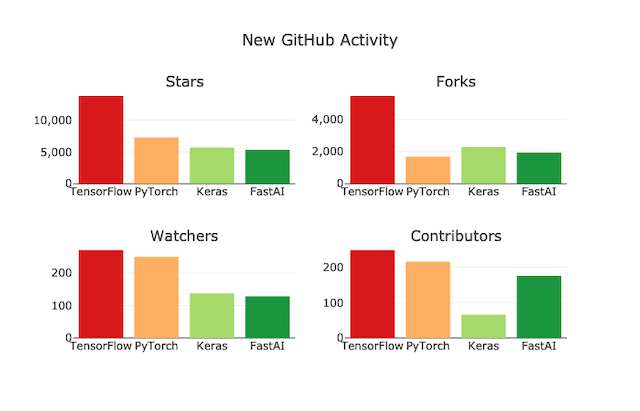

Fast.ai contain separate modules for different types of data: *vision*, *text* or *tabular*. Each module is a set of ready-to-use functions to load data, select a suitable model and train the model. For more information, read the documentation [here](https://fastai1.fast.ai/applications.html).

Before we start, please install the fast.ai library according to the instructions [here](https://github.com/fastai/fastai/blob/master/README.md#installation) but with some changes. 

If you are using Conda, you should simply run the following command in your terminal (note that you need to replace *your_env_name* with your own environment): 

```
    conda activate [your_env_name, e.g. sds2020]
    conda install -c pytorch -c fastai fastai=1.*
```

These commands may activate your environment, and then install fastai (version 1.0.61 or similar) while updating a list of other packages. Type 'y' to proceed if you are asked 'Procedd?\[y/n\]'.

Please make sure that you are using fastai v1 for this workshop. The APIs of fastai have changed dramatically between v1 and v2 (the current version).

After the installation, you may check the installed version of **fastai** using the following command (for Linux/Mac):

```
conda list | grep fastai
```

If you are using Windows cmd, an alternative command would be:
```
conda list | findstr fastai
```

The version should be 1.\*. If you have installed v2, please rerun the installation command to get v1.

In [9]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *
# defaults.device = torch.device('cpu')

## Vision

To quickly get access to all the vision functions inside fastai, we use the usual import statements.

In [10]:
from fastai.vision import *

### A classification problem

Let's begin with our sample of the MNIST dataset.

In [11]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

Print the value of URLs.MNIST_TINY to see where the data is downloaded from.

In [12]:
print(URLs.MNIST_TINY)

http://files.fast.ai/data/examples/mnist_tiny


In [13]:
mnist

WindowsPath('C:/Users/Huanfa Chen/.fastai/data/mnist_tiny')

Check where the data is saved by default.

It's set up with an ImageNet structure so we use it to load our training and validation datasets, then label, transform, convert them into ImageDataBunch and finally, normalize them.

In [14]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

Once your data is properly set up in a [`DataBunch`](/basic_data.html#DataBunch), we can call `data.show_batch()` to see what a sample of a batch looks like.

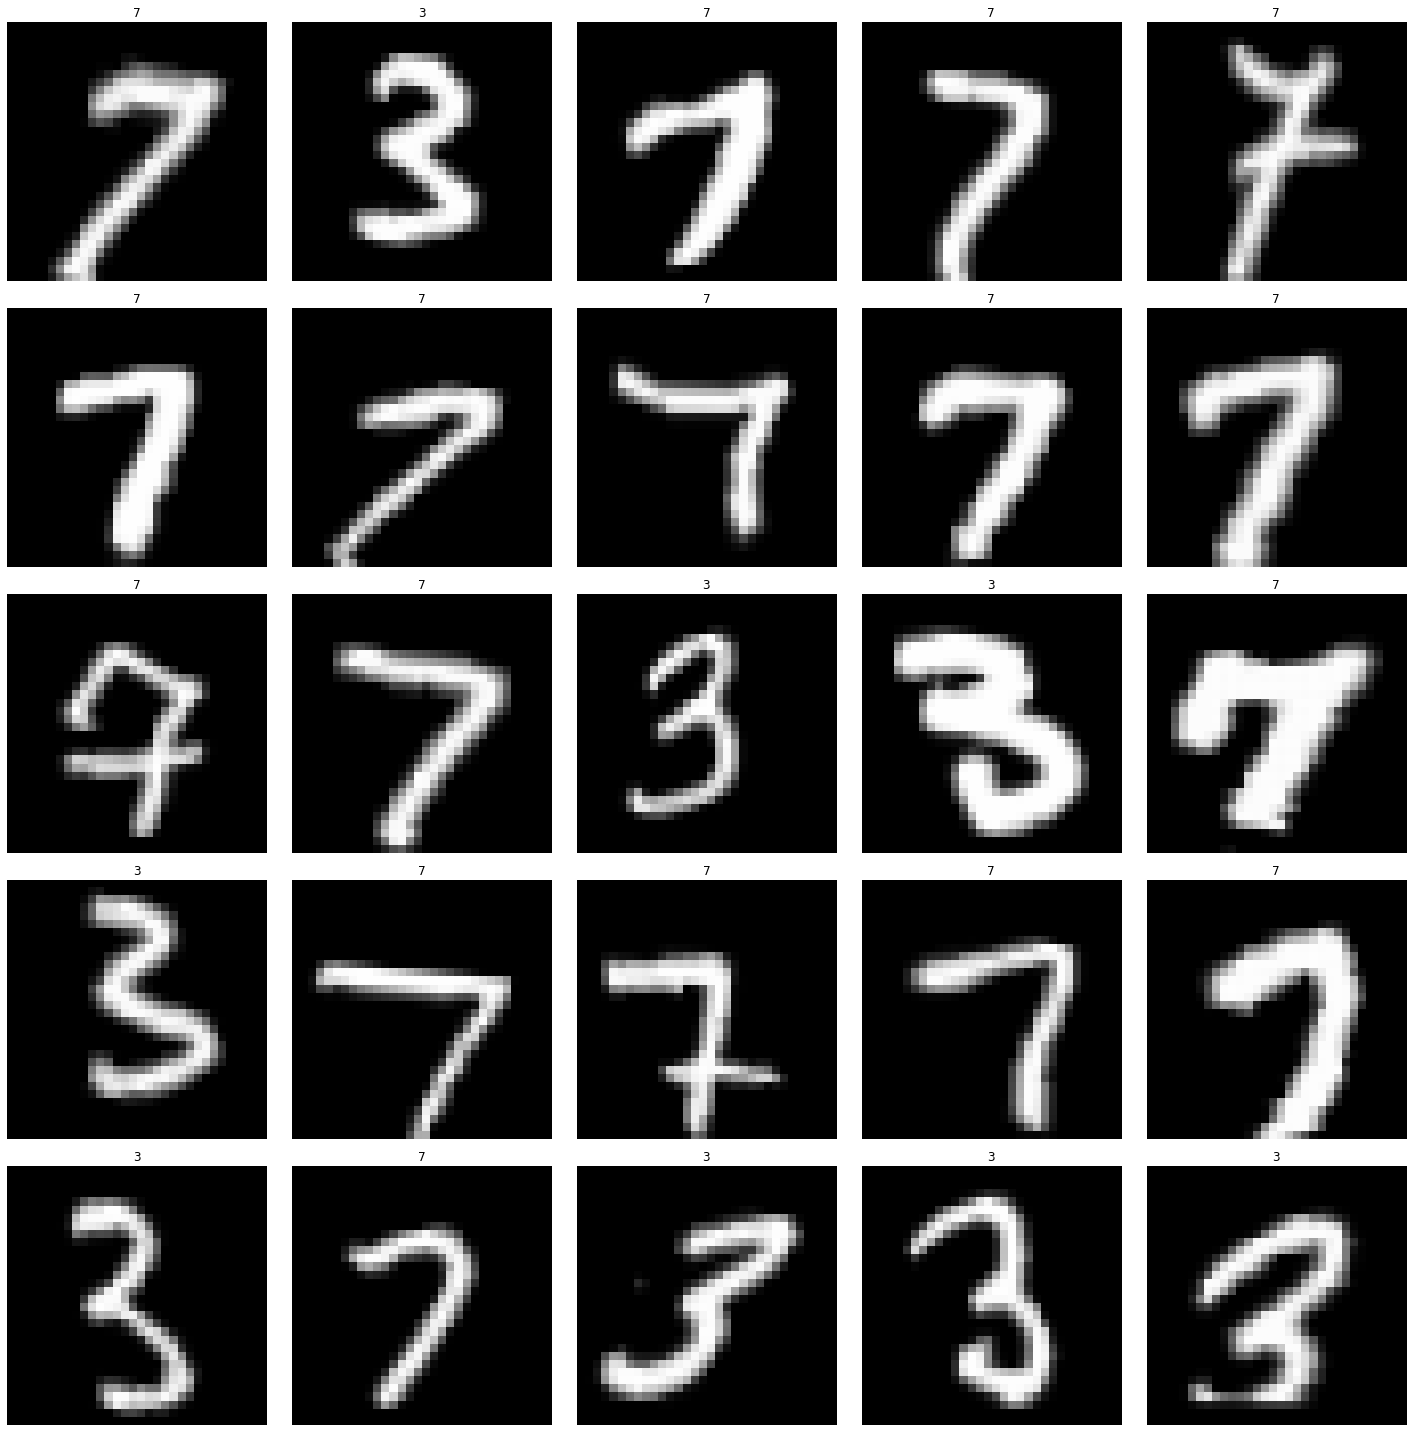

In [15]:
data.show_batch()

Note that the images were automatically de-normalized before being showed with their labels (inferred from the names of the folder). We can specify a number of rows if the default of 5 is too big, and we can also limit the size of the figure.

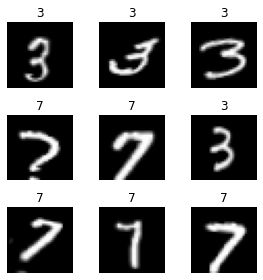

In [16]:
data.show_batch(rows=3, figsize=(4,4))

Now let's create a [`Learner`](https://docs.fast.ai/vision.learner.html) object to train a classifier. 

In [17]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Huanfa Chen/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


Our model has quickly reached around 91% accuracy, now let's see its predictions on a sample of the validation set. For this, we use the `show_results` method.

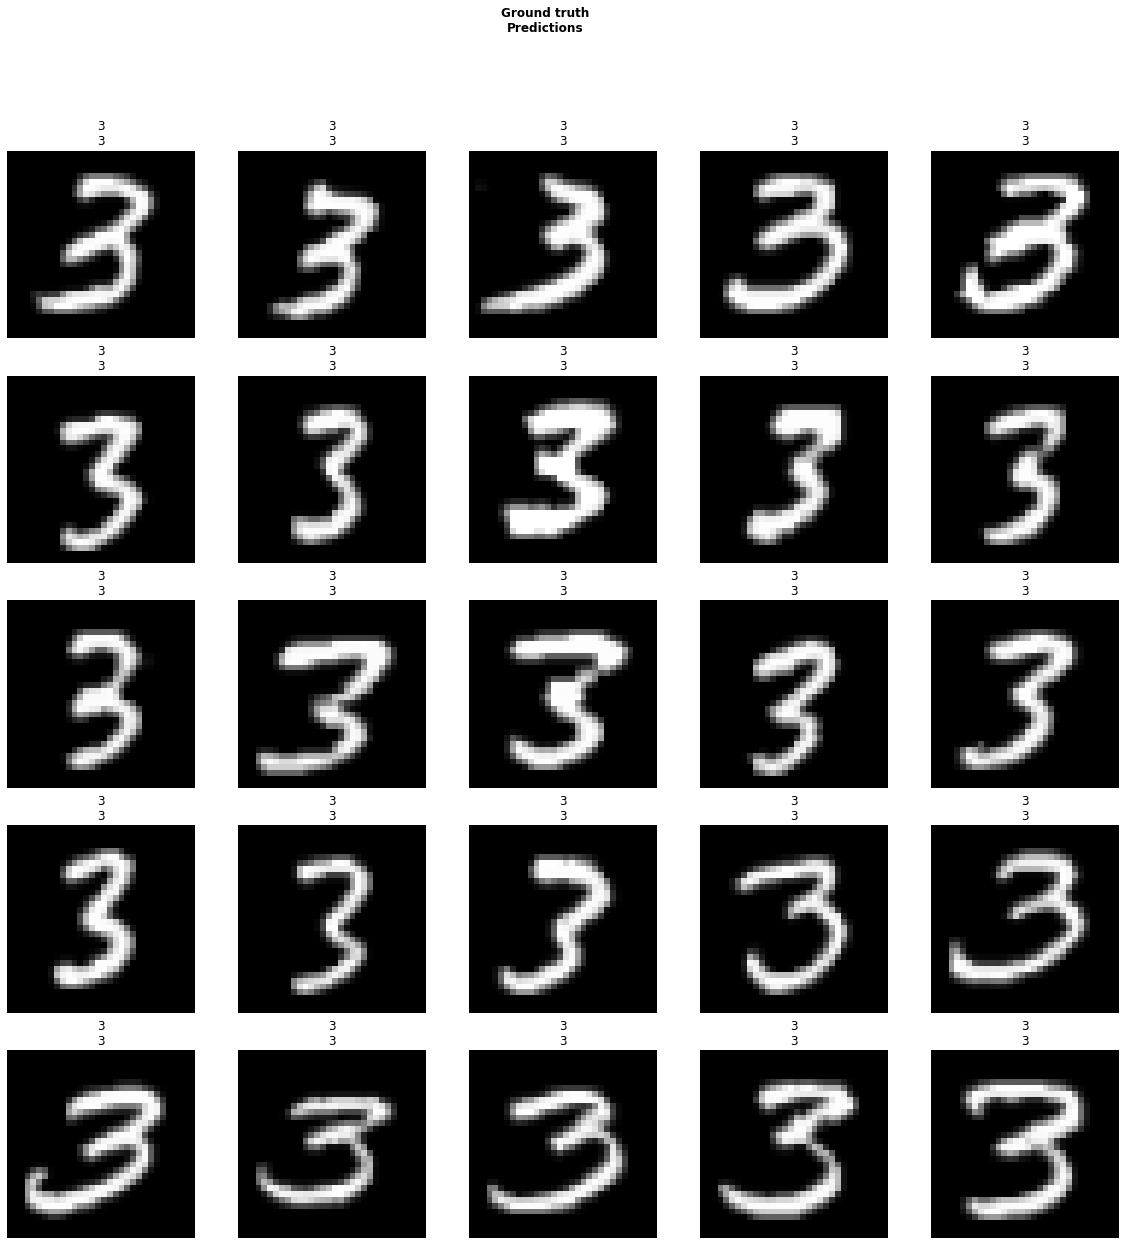

In [18]:
learn.show_results()

Since the validation set is usually sorted, we get only images belonging to the same class. We can then again specify a number of rows, a figure size, but also the dataset on which we want to make predictions.

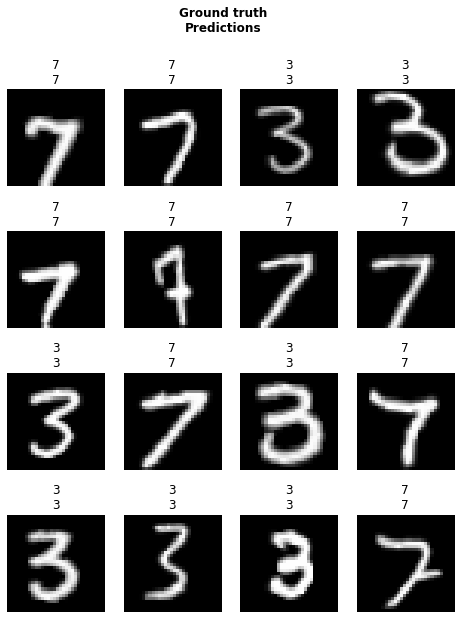

In [19]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))

### A multilabel problem

Now let's try these on the planet dataset, which is a little bit different in the sense that each image can have multiple tags (and not just one label).

In [20]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

Here each images is labelled in a file named 'labels.csv'. We have to add 'train' as a prefix to the filenames, '.jpg' as a suffix and the labels are separated by spaces.

In [21]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

C:\Users\Huanfa Chen\Anaconda3\envs\sds2020\lib\site-packages\fastai\core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


And we can have look at our data with `data.show_batch`.

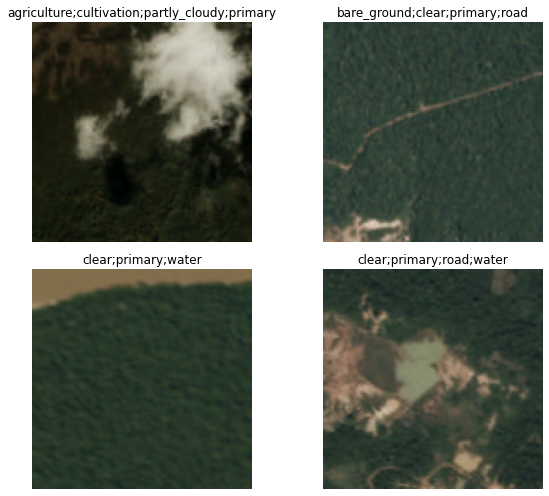

In [22]:
data.show_batch(rows=2, figsize=(9,7))

Then we can then create a [`Learner`](/basic_train.html#Learner) object pretty easily and train it for a little bit.

In [23]:
learn = cnn_learner(data, models.resnet18)
learn.fit_one_cycle(5,1e-2)
learn.save('mini_train')

And to see actual predictions, we just have to run `learn.show_results()`.

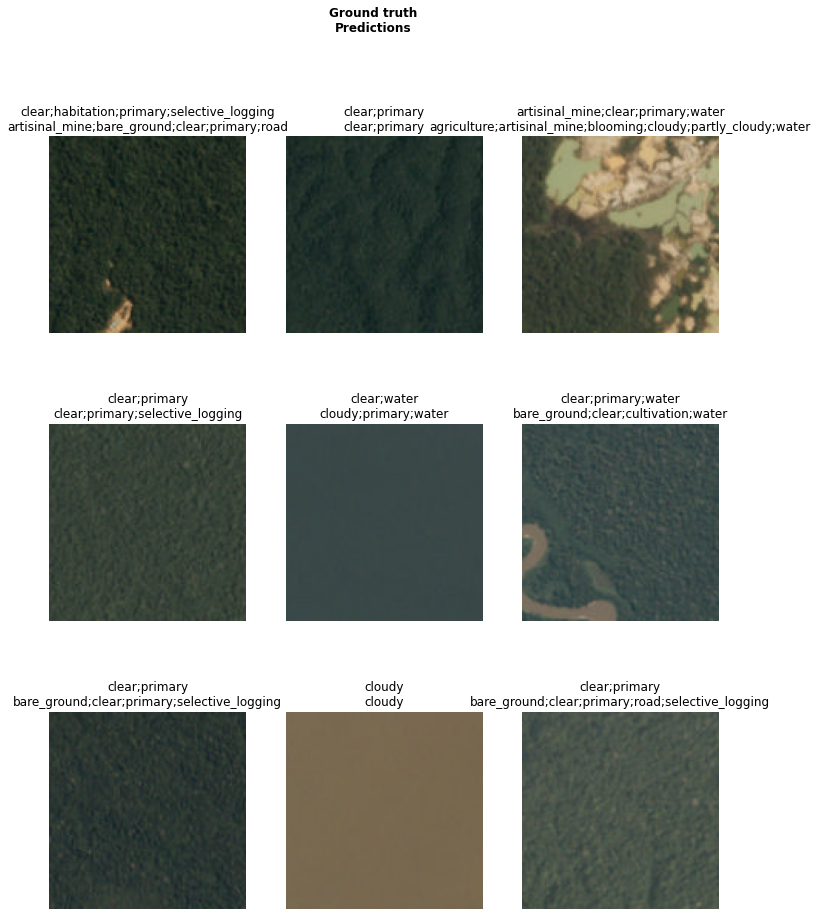

In [24]:
learn.show_results(rows=3, figsize=(12,15))

### A regression example

For the next example, we are going to use the [BIWI head pose](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db) dataset. On pictures of persons, we have to find the center of their face. For the fastai docs, we have built a small subsample of the dataset (200 images) and prepared a dictionary for the correspondance filename to center.

In [25]:
biwi = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = pickle.load(open(biwi/'centers.pkl', 'rb'))

To grab our data, we use this dictionary to label our items. We also use the [`PointsItemList`](/vision.data.html#PointsItemList) class to have the targets be of type [`ImagePoints`](/vision.image.html#ImagePoints) (which will make sure the data augmentation is properly applied to them). When calling [`transform`](/tabular.transform.html#tabular.transform) we make sure to set `tfm_y=True`.

In [26]:
data = (PointsItemList.from_folder(biwi)
        .split_by_rand_pct(seed=42)
        .label_from_func(lambda o:fn2ctr[o.name])
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

Then we can have a first look at our data with `data.show_batch()`.

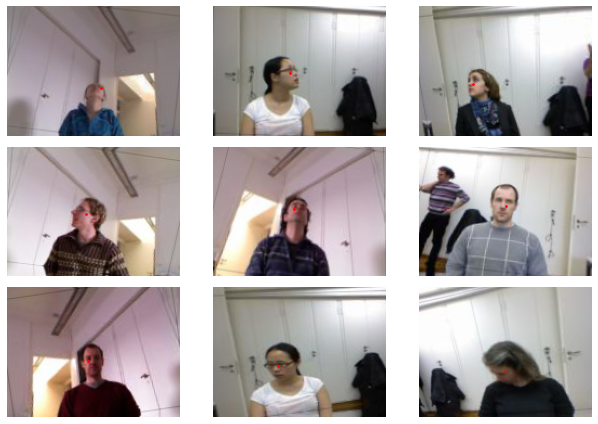

In [27]:
data.show_batch(rows=3, figsize=(9,6))

We train our model for a little bit before using `learn.show_results()`.

In [28]:
learn = cnn_learner(data, models.resnet18, lin_ftrs=[100], ps=0.05)
learn.fit_one_cycle(5, 5e-2)
learn.save('mini_train')

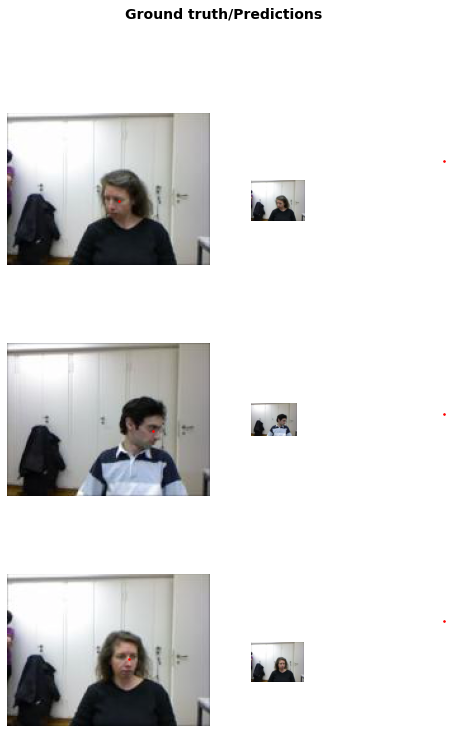

In [29]:
learn.show_results(rows=3)

### A segmentation example

Now we are going to look at the [camvid dataset](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) (at least a small sample of it), where we have to predict the class of each pixel in an image. Each image in the 'images' subfolder as an equivalent in 'labels' that is its segmentations mask.

In [30]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

We read the classes in 'codes.txt' and the function maps each image filename with its corresponding mask filename.

In [31]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str)
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

The data block API allows us to uickly get everything in a [`DataBunch`](/basic_data.html#DataBunch) and then we can have a look with `show_batch`.

In [32]:
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=camvid, num_workers=0)
        .normalize(imagenet_stats))

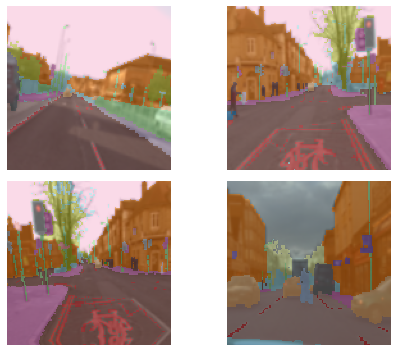

In [33]:
data.show_batch(rows=2, figsize=(7,5))

Then we train a Unet for a few epochs.

In [34]:
jekyll_warn("This training is fairly unstable, you should use more epochs and the full dataset to get better results.")

<div markdown="span" class="alert alert-danger" role="alert"><i class="fa fa-danger-circle"></i> <b>Warning: </b>This training is fairly unstable, you should use more epochs and the full dataset to get better results.</div>

In [35]:
learn = unet_learner(data, models.resnet18)
learn.fit_one_cycle(3,1e-2)
learn.save('mini_train')

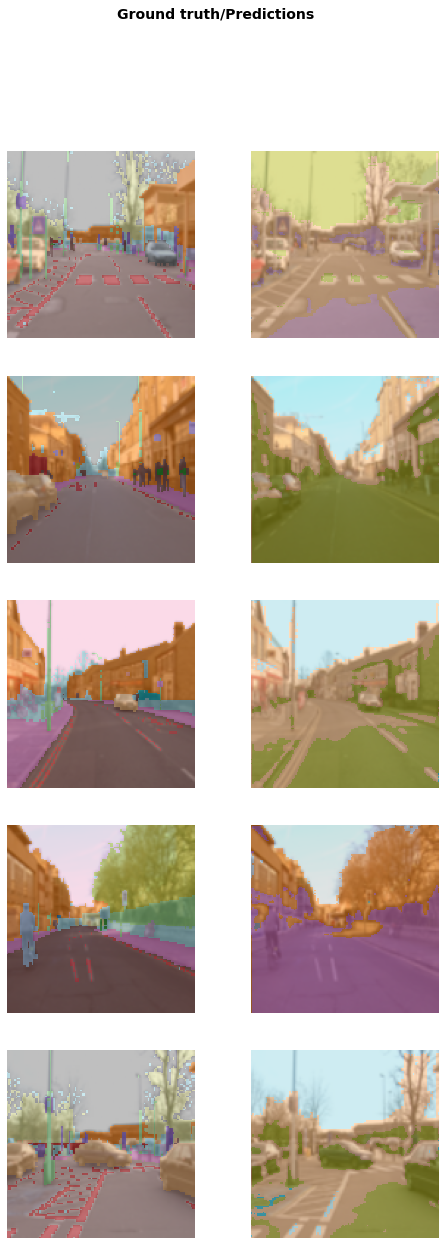

In [36]:
learn.show_results()

## Text

Next application is text, so let's start by importing everything we'll need.

In [37]:
from fastai.text import *

### Language modelling

First we'll fine-tune a pretrained language model on our subset of imdb.

In [38]:
imdb = untar_data(URLs.IMDB_SAMPLE)

In [39]:
defaults.cpus=1 # Reason: https://github.com/fastai/fastai/issues/1850

In [40]:
data_lm = (TextList.from_csv(imdb, 'texts.csv', cols='text')
                   .split_by_rand_pct()
                   .label_for_lm()
                   .databunch(num_workers=0))
data_lm.save()

C:\Users\Huanfa Chen\Anaconda3\envs\sds2020\lib\site-packages\fastai\core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


`data.show_batch()` will work here as well. For a language model, it shows us the beginning of each sequence of text along the batch dimension (the target being to guess the next word).

In [41]:
data_lm.show_batch()

C:\Users\Huanfa Chen\Anaconda3\envs\sds2020\lib\site-packages\fastai\text\data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


Now let's define a language model learner

In [42]:
learn = language_model_learner(data_lm, AWD_LSTM)
learn.fit_one_cycle(2, 1e-2)
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

Then we can have a look at the results. It shows a certain amount of words (default 20), then the next 20 target words and the ones that were predicted.

In [43]:
learn.show_results()

### Classification

Now let's see a classification example. We have to use the same vocabulary as for the language model if we want to be able to use the encoder we saved.

In [44]:
data_clas = (TextList.from_csv(imdb, 'texts.csv', cols='text', vocab=data_lm.vocab)
                   .split_from_df(col='is_valid')
                   .label_from_df(cols='label')
                   .databunch(bs=42,num_workers=0))

C:\Users\Huanfa Chen\Anaconda3\envs\sds2020\lib\site-packages\fastai\core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


C:\Users\Huanfa Chen\Anaconda3\envs\sds2020\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Here show_batch shows the beginning of each review with its target.

In [45]:
data_clas.show_batch()

And we can train a classifier that uses our previous encoder.

In [46]:
learn = text_classifier_learner(data_clas, AWD_LSTM)
learn.load_encoder('mini_train_encoder')
learn.fit_one_cycle(2, slice(1e-3,1e-2))
learn.save('mini_train_clas')

C:\Users\Huanfa Chen\Anaconda3\envs\sds2020\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Huanfa Chen\Anaconda3\envs\sds2020\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

In [47]:
learn.show_results()

## Now try to train a classifier on your own data

As the final task, we ask you to train your own image classifier. All you need to do is to create your own dataset with images. The dataset should have the structure described in [this post](https://forums.fast.ai/t/how-to-use-your-own-dataset-for-lesson-1/14195). Once you create the dataset, follow the same steps as in the MNIST classification example above, but with your own path to folder, i.e.:

```
data = (ImageList.from_folder(**your_path_to_folder**)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))
```

# References

- [Practical Deep Learning for Coders *by fastai*](https://course.fast.ai/)
- [Machine Learning course *by Andrew Ng on Coursera*](https://www.coursera.org/learn/machine-learning). Note that this course is free.
- [Deep Learning Specialisation *by DeepLearning.AI on Coursera*](https://www.coursera.org/learn/neural-networks-deep-learning/home/). Note UCL is now on the Campus Basic Plan of Coursera, see [here ](https://blogs.ucl.ac.uk/digital-education/2020/05/13/access-to-coursera-for-ucl/).
- [AI for Everyone *by Coursera*](https://www.coursera.org/learn/ai-for-everyone)
